In [1]:
#Dependencies 
import numpy as np
import pandas as pd
import requests
import time
import json
import datetime
#from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from glob import glob
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter


In [2]:
##### Covid data from CDC API starting here:
url = "https://data.cdc.gov/resource/vbim-akqf.json"
print(requests.get(url))
print(requests.get(url).json())

url = "https://data.cdc.gov/resource/vbim-akqf.json"
response = requests.get(url)
response_json = response.json()
print(json.dumps(response_json, indent=4, sort_keys=True))

<Response [200]>
[{'cdc_report_dt': '2020-07-03T00:00:00.000', 'current_status': 'Laboratory-confirmed case', 'sex': 'Female', 'age_group': '0 - 9 Years', 'race_ethnicity_combined': 'American Indian/Alaska Native, Non-Hispanic', 'hosp_yn': 'Missing', 'icu_yn': 'Missing', 'death_yn': 'Missing', 'medcond_yn': 'Missing'}, {'cdc_report_dt': '2020-05-27T00:00:00.000', 'current_status': 'Laboratory-confirmed case', 'sex': 'Female', 'age_group': '0 - 9 Years', 'race_ethnicity_combined': 'American Indian/Alaska Native, Non-Hispanic', 'hosp_yn': 'No', 'icu_yn': 'Missing', 'death_yn': 'No', 'medcond_yn': 'Missing'}, {'cdc_report_dt': '2020-06-06T00:00:00.000', 'current_status': 'Laboratory-confirmed case', 'sex': 'Female', 'age_group': '0 - 9 Years', 'race_ethnicity_combined': 'American Indian/Alaska Native, Non-Hispanic', 'hosp_yn': 'Missing', 'icu_yn': 'Missing', 'death_yn': 'Missing', 'medcond_yn': 'Missing'}, {'cdc_report_dt': '2020-06-28T00:00:00.000', 'current_status': 'Laboratory-confirme

[
    {
        "age_group": "0 - 9 Years",
        "cdc_report_dt": "2020-07-03T00:00:00.000",
        "current_status": "Laboratory-confirmed case",
        "death_yn": "Missing",
        "hosp_yn": "Missing",
        "icu_yn": "Missing",
        "medcond_yn": "Missing",
        "race_ethnicity_combined": "American Indian/Alaska Native, Non-Hispanic",
        "sex": "Female"
    },
    {
        "age_group": "0 - 9 Years",
        "cdc_report_dt": "2020-05-27T00:00:00.000",
        "current_status": "Laboratory-confirmed case",
        "death_yn": "No",
        "hosp_yn": "No",
        "icu_yn": "Missing",
        "medcond_yn": "Missing",
        "race_ethnicity_combined": "American Indian/Alaska Native, Non-Hispanic",
        "sex": "Female"
    },
    {
        "age_group": "0 - 9 Years",
        "cdc_report_dt": "2020-06-06T00:00:00.000",
        "current_status": "Laboratory-confirmed case",
        "death_yn": "Missing",
        "hosp_yn": "Missing",
        "icu_yn": "Missing",

In [3]:
cases_df =  pd.DataFrame({
    "State": ["Georgia", "California", "Illinois", "Texas", "New York"],
    "Cases": [175052, 466550, 174973, 394265, 225850]})
cases_df

,State,Cases
0,Georgia,175052
1,California,466550
2,Illinois,174973
3,Texas,394265
4,New York,225850


In [4]:
#Airport Data 2017
airport_data_2017 = '../project_data/airline_data/TFMSC_Report_2017.csv'
df = pd.read_csv(airport_data_2017)
new_df = df.dropna()
new_df

#grouped_df = new_df.groupby(['Airport'])
#grouped_df.head()

#cleaned_2017_df = new_df[['Date','Airport','Flight Type','Departures','Departure Seats']]
#cleaned_2017_df.head()

,Date,Airport,Flight Type,Departures,Departure Seats
0,1/1/2017,ATL - Atlanta,US to Foreign,8,"2,680"
1,1/1/2017,ATL - Atlanta,US to Foreign,1,335
2,1/1/2017,ATL - Atlanta,US to Foreign,1,364
3,1/1/2017,ATL - Atlanta,US to Foreign,7,"1,610"
4,1/1/2017,ATL - Atlanta,US to Foreign,7,"1,715"
...,...,...,...,...,...
90486,12/31/2017,ORD - Chicago,Domestic,2,180
90487,12/31/2017,ORD - Chicago,Domestic,94,"4,700"
90488,12/31/2017,ORD - Chicago,Domestic,41,"2,870"
90489,12/31/2017,ORD - Chicago,Domestic,4,360


In [5]:
#Airport Data 2018
airport_data_2018 = '../project_data/airline_data/TFMSC_Report_2018.csv'
df = pd.read_csv(airport_data_2018)
new_df = df.dropna()
new_df

#grouped_df = new_df.groupby(['Airport'])
#grouped_df.head()

cleaned_2018_df = new_df[['Date','Airport','Flight Type','Departures','Departure Seats']]
cleaned_2018_df.head()

,Date,Airport,Flight Type,Departures,Departure Seats
0,1/1/2018,ATL - Atlanta,US to Foreign,5,"1,675"
1,1/1/2018,ATL - Atlanta,US to Foreign,1,335
2,1/1/2018,ATL - Atlanta,US to Foreign,6,"1,380"
3,1/1/2018,ATL - Atlanta,US to Foreign,6,"1,470"
4,1/1/2018,ATL - Atlanta,US to Foreign,6,"1,775"


In [6]:
#Airport Data 2019
airport_data_2019 = '../project_data/airline_data/TFMSC_Report_2019.csv'
df = pd.read_csv(airport_data_2019)
new_df = df.dropna()
new_df

#grouped_df = new_df.groupby(['Airport'])
#grouped_df.head()

cleaned_2019_df = new_df[['Date','Airport','Flight Type','Departures','Departure Seats']]
cleaned_2019_df.head()

,Date,Airport,Flight Type,Departures,Departure Seats
0,1/1/2019,ATL - Atlanta,US to Foreign,5,"1,265"
1,1/1/2019,ATL - Atlanta,US to Foreign,3,"1,005"
2,1/1/2019,ATL - Atlanta,US to Foreign,1,372
3,1/1/2019,ATL - Atlanta,US to Foreign,1,314
4,1/1/2019,ATL - Atlanta,US to Foreign,1,416


In [7]:
#Airport Data 2020
airport_data_2020 = '../project_data/airline_data/TFMSC_Report_2020.csv'
df = pd.read_csv(airport_data_2020)
new_df = df.dropna()
new_df

#grouped_df = new_df.groupby(['Airport'])
#grouped_df.head()

cleaned_2020_df = new_df[['Date','Airport','Flight Type','Departures','Departure Seats']]
cleaned_2020_df.head()

,Date,Airport,Flight Type,Departures,Departure Seats
0,1/1/2020,ATL - Atlanta,US to Foreign,2,506
1,1/1/2020,ATL - Atlanta,US to Foreign,5,"1,635"
2,1/1/2020,ATL - Atlanta,US to Foreign,1,372
3,1/1/2020,ATL - Atlanta,US to Foreign,2,628
4,1/1/2020,ATL - Atlanta,US to Foreign,1,480


In [8]:
#Begin Max work on Departure Seats calculation

#Using sample of 2019 cleaned df
cleaned_2019_df.head()

,Date,Airport,Flight Type,Departures,Departure Seats
0,1/1/2019,ATL - Atlanta,US to Foreign,5,"1,265"
1,1/1/2019,ATL - Atlanta,US to Foreign,3,"1,005"
2,1/1/2019,ATL - Atlanta,US to Foreign,1,372
3,1/1/2019,ATL - Atlanta,US to Foreign,1,314
4,1/1/2019,ATL - Atlanta,US to Foreign,1,416


In [9]:
import datetime
#cleaned_2020_df["Year"] = datetime.datetime.strptime(str(cleaned_2020_df["Date"]), "%m/%d/%Y").year
#cleaned_2020_df["Year"] = cleaned_2020_df["Date"].year

#cleaned_2020_df["Year"] = datetime.datetime.strptime(str(cleaned_2020_df["Date"]), "%m/%d/%Y").year
#cleaned_2020_df["String Date"] = str(cleaned_2020_df["Date"])
#cleaned_2020_df

#convert dates to datetime
cleaned_2019_df['month'] = pd.to_datetime(cleaned_2019_df['Date'], format='%m/%d/%Y').dt.month
cleaned_2019_df['year'] = pd.to_datetime(cleaned_2019_df['Date'], format='%m/%d/%Y').dt.year
cleaned_2019_df["Departure Seats"].describe


<bound method NDFrame.describe of 0        1,265
1        1,005
2          372
3          314
4          416
         ...  
92424    9,870
92425      315
92426    6,600
92427    4,690
92428      360
Name: Departure Seats, Length: 92429, dtype: object>

In [50]:
#Airport Data 2019
airport_data_2019 = '../project_data/airline_data/TFMSC_Report_2019.csv'
df = pd.read_csv(airport_data_2019)
new_df = df.dropna()
new_df
#grouped_df = new_df.groupby(['Airport'])
#grouped_df.head()
cleaned_2019_df = new_df[['Date','Airport','Flight Type','Departures','Departure Seats']]
cleaned_2019_df.head()
cleaned_2019_df['month'] = pd.to_datetime(cleaned_2019_df['Date'], format='%m/%d/%Y').dt.month
cleaned_2019_df['year'] = pd.to_datetime(cleaned_2019_df['Date'], format='%m/%d/%Y').dt.year
cleaned_2019_df["Departure Seats"] = cleaned_2019_df["Departure Seats"].astype(str) 
cleaned_2019_df["Departure Seats"] = cleaned_2019_df["Departure Seats"].str.replace(',', '')
cleaned_2019_df["Departure Seats"] = cleaned_2019_df["Departure Seats"].astype(int)
cleaned_2019_df

,Date,Airport,Flight Type,Departures,Departure Seats,month,year
0,1/1/2019,ATL - Atlanta,US to Foreign,5,1265,1,2019
1,1/1/2019,ATL - Atlanta,US to Foreign,3,1005,1,2019
2,1/1/2019,ATL - Atlanta,US to Foreign,1,372,1,2019
3,1/1/2019,ATL - Atlanta,US to Foreign,1,314,1,2019
4,1/1/2019,ATL - Atlanta,US to Foreign,1,416,1,2019
...,...,...,...,...,...,...,...
92424,12/31/2019,ORD - Chicago,Domestic,141,9870,12,2019
92425,12/31/2019,ORD - Chicago,Domestic,9,315,12,2019
92426,12/31/2019,ORD - Chicago,Domestic,132,6600,12,2019
92427,12/31/2019,ORD - Chicago,Domestic,67,4690,12,2019


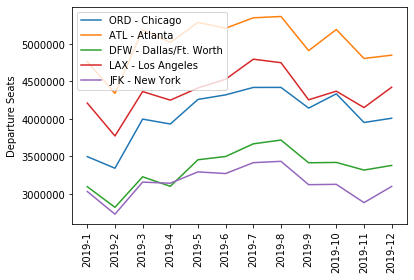

<Figure size 432x288 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
# Used for combining year-month
date_group = []
# Self explains
airport_names = ["ORD - Chicago",
                 "ATL - Atlanta",
                 "DFW - Dallas/Ft. Worth",
                 "LAX - Los Angeles",
                 "JFK - New York"]
# The group by used to sum departures
gp = cleaned_2019_df.groupby(['Airport','year','month'])
airport_2019 = gp.sum()
#print(airport_2019)
# concatenating the multiindex year and month column into one
for i in airport_2019.index:
    date_group.append(str(i[1]) + "-" + str(i[2]))
# Creating the x axis values used to display the time series
airport_2019["date_group"] = date_group
# Drop the index
airport_2019.droplevel(['year', 'month'])
# Conjutes the canvas used to draw the graphs
fig, ax = plt.subplots()
# Iterate over airports and draws a time series for each
for airport in airport_names:
    df = airport_2019.loc[airport,["Departure Seats", "date_group"]]
    line, = ax.plot(df["date_group"], df["Departure Seats"], label = airport)
plt.xticks(rotation=90)
plt.ylabel("Departure Seats")
ax.legend()
plt.show()
plt.savefig('../images/departseats19.png')

In [ ]:
########### Dave's code below for 2017-18 flu ################
# import and clean data from CDC FluView website csv download

In [ ]:
# define data file
flu_state = "../project_data/flu_data/State_ILINet.csv"

In [ ]:
# read data file
raw_state_flu_2017 = pd.read_csv(flu_state)

In [ ]:
raw_state_flu_2017.head(15)

In [ ]:
# create datetime column from year and week 
raw_state_flu_2017['formatted_date'] = raw_state_flu_2017.YEAR * 1000 + raw_state_flu_2017.WEEK * 10
raw_state_flu_2017['date'] = pd.to_datetime(raw_state_flu_2017['formatted_date'], format='%Y%W%w')
raw_state_flu_2017.head()

In [ ]:
# collect a list of all columns within the DataFrame
raw_state_flu_2017.columns

In [ ]:
# extract required columns to new DataFrame
temp_state_flu_2017 = raw_state_flu_2017[['REGION', 'YEAR', 'WEEK', 'date', 'ILITOTAL']]
temp_state_flu_2017.head()

In [ ]:
# drop rows with "X" in ILITOTAL column
temp_state_flu_2017 = temp_state_flu_2017[temp_state_flu_2017.ILITOTAL != 'X']
temp_state_flu_2017.head(15)

In [ ]:
#check data types
temp_state_flu_2017.dtypes

In [ ]:
# identify incomplete rows
temp_state_flu_2017.count()

In [ ]:
# use pd.to_numeric() method to convert the datatype of the ILITOTAL column
temp_state_flu_2017['ILITOTAL'] = pd.to_numeric(temp_state_flu_2017['ILITOTAL'])
temp_state_flu_2017['ILITOTAL'].dtype

In [ ]:
# rename the columns     
clean_state_flu_2017 = temp_state_flu_2017.rename(columns={"REGION":"State",
                                                           "YEAR":"Year",
                                                           "WEEK":"Week",
                                                           "date":"Week Ending Date",
                                                           "ILITOTAL":"ILI Cases"})
clean_state_flu_2017.head()

In [ ]:
# determine the total number of ILI Cases
total_cases = clean_state_flu_2017["ILI Cases"].sum()
total_cases

In [ ]:
# determine the total of all ILI Cases by week
ILI_by_week = clean_state_flu_2017.groupby(['Week Ending Date']).sum()['ILI Cases']
ILI_by_week

In [ ]:
type(ILI_by_week)

In [ ]:
# count how many ILI cases have occured within each state
ILI_by_state = clean_state_flu_2017.groupby('State').sum()['ILI Cases']
ILI_by_state.head()

In [ ]:
type(ILI_by_state)

In [ ]:
# determine the total of all ILI Cases by week per state
ILI_by_state_by_week = clean_state_flu_2017.groupby(['State', 'Week Ending Date']).sum()['ILI Cases']
ILI_by_state_by_week.head(15)

In [ ]:
type(ILI_by_state_by_week)

In [ ]:
# create a bar chart from the series
ILI_by_week.plot.bar(x='Week Ending Date', y=ILI_by_week, color='mediumblue', align="center", width=0.8)

# Method 1
#fig, ax = plt.subplots()
#loc = WeekdayLocator(byweekday=SU, interval=4, tz=None)
#ax.xaxis.set_major_locator(loc)

# Method 2
def apply_date_formatting_to_axis(ax):
    # format x-axis of input plot to a readable date format
    dates = ['Week Ending Date']
    ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=SU, interval=4))
    #ax.xaxis.set_major_formatter(dates.DateFormatter('%d\n%a'))
    #ax.xaxis.grid(True, which="minor")
    #ax.yaxis.grid()
    return ax 

# Method 3
# tell matplotlib which x axis labels to display
# for i, t in enumerate(['Week Ending Date'].get_xlabel()):
#     if (i % 5) != 0:
#         t.set_visible(False)

# give the chart some labels and a title
plt.title("2017-18 USA Flu Season Positive Lab Test Results")
plt.xlabel("Week Ending Date")
plt.ylabel("Number of Influenza-Like-Infections (ILI)")

# change figure size
plt.rcParams['figure.figsize'] = (12,6)

# save an image of the chart and print it to the screen
plt.savefig("../images/flu_by_week.png")
plt.show()

In [ ]:
# create a bar chart from the series
ILI_by_state.plot.bar(x='Week Ending Date', y=ILI_by_state, color='darkgreen', align="center", width=0.8)

# give the chart some labels and a title
plt.title("2017-18 Flu Season Positive Lab Test Results by State")
plt.xlabel("State")
plt.ylabel("Number of Influenza-Like-Infections (ILI)")

# change figure size
plt.rcParams['figure.figsize'] = (12,6)

# save an image of the chart and print it to the screen
plt.savefig("../images/flu_by_state.png")
plt.show()